In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
one_hot_encoder = OneHotEncoder(sparse=False)
import seaborn as sns
import pandas as pd

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Epoch 20
Training Accuracy:0.9333333333333333
Validation Accuracy:0.9777777777777777
Epoch 40
Training Accuracy:0.9714285714285714
Validation Accuracy:1.0
Epoch 60
Training Accuracy:0.9714285714285714
Validation Accuracy:0.9777777777777777
Epoch 80
Training Accuracy:0.9714285714285714
Validation Accuracy:0.9777777777777777
Epoch 100
Training Accuracy:0.9809523809523809
Validation Accuracy:0.9777777777777777


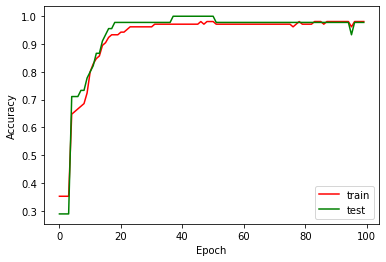

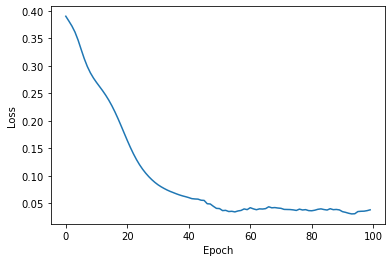

In [3]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    train_score = []
    val_score = []
    losses = []
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights,loss = Train(X_train, Y_train, lr, weights)
        
        train_score.append(Accuracy(X_train, Y_train, weights))
        val_score.append(Accuracy(X_val, Y_val, weights))
        losses.append(loss)
        
        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights,train_score,val_score, losses

def InitializeWeights(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augment with bias
    
    return activations

def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal) # Error at output
    
    loss = np.mean(np.abs(error))
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            # Augment previous activation
            prevActivation = np.append(1, activations[j-1])
        else:
            # First hidden layer, prevActivation is input (without bias)
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1) # Remove bias from weights
        error = np.dot(delta, w) # Calculate error for current layer
    
    return weights, loss

def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector
        
        activations = ForwardPropagation(x, weights, layers)
        weights , loss = BackPropagation(y, activations, weights, layers)

    return weights, loss

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) # Augment feature vector
    
    ##_Forward Propagation_##
    activations = ForwardPropagation(item, weights, layers)
    
    outputFinal = activations[-1].A1

    index = FindMaxActivation(outputFinal)

    # Initialize prediction vector to zeros
    y = [0 for i in range(len(outputFinal))]
    y[index] = 1  # Set guessed class to 1

    return y # Return prediction vector


def FindMaxActivation(output):
    """Find max activation in output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

def Accuracy(X, Y, weights):
    """Run set through network, find overall accuracy"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):
            # Guessed correctly
            correct += 1

    return correct / len(X)

f = 4 # Number of features
o = 3 # Number of outputs / classes

layers = [f, 5, 10, o] # Number of nodes in layers
lr, epochs = 0.15, 100

weights,train_score,val_score,losses = NeuralNetwork(X_train, y_train, X_test, y_test, epochs=epochs, nodes=layers, lr=lr)

plt.plot(range(epochs), train_score, color='r', label='train')
plt.plot(range(epochs), val_score, color='g', label='test')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(epochs),losses)
plt.show()

In [4]:
for i in range(len(X_test)):
    x, y = X_test[i], list(y_test[i])
    guess = Predict(x, weights)

    if(y != guess):
        # Guessed incorrectly
        print("Incorrect: {}, class: {}".format(x, y))

print("\nMax per feature:")
print(np.max(X_test[:,0]),np.max(X_test[:,1]),np.max(X_test[:,2]),np.max(X_test[:,3]))
print("\nMin per feature:")
print(np.min(X_test[:,0]),np.min(X_test[:,1]),np.min(X_test[:,2]),np.min(X_test[:,3]))

Incorrect: [6.2 2.2 4.5 1.5], class: [0.0, 1.0, 0.0]

Max per feature:
7.9 4.4 6.9 2.3

Min per feature:
4.4 2.2 1.0 0.1


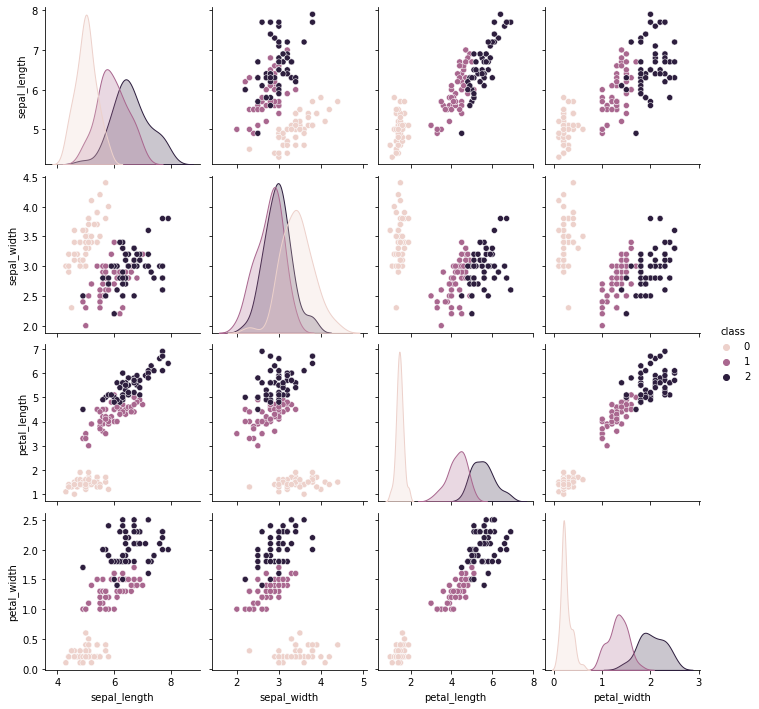

In [5]:
iris = datasets.load_iris()

#Convert to data frame
df = pd.DataFrame(iris.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['class'] = iris.target

sns.pairplot(df, hue='class')  
plt.show()